In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class'] = (df['class'] == 'g').astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

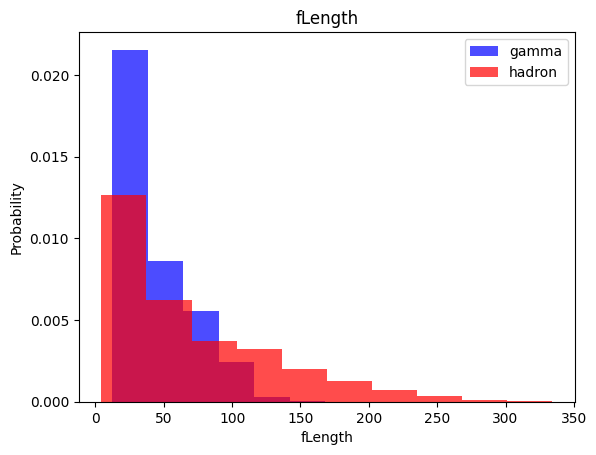

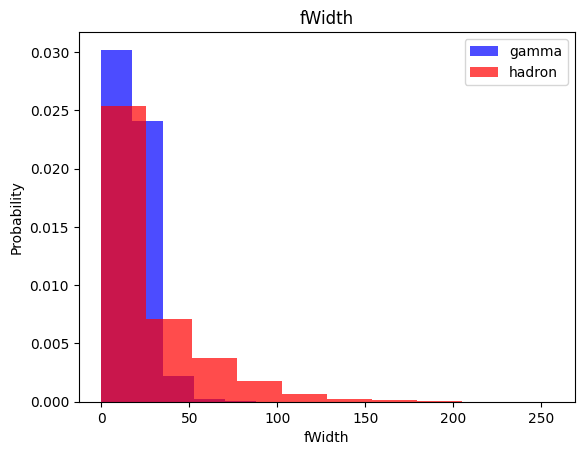

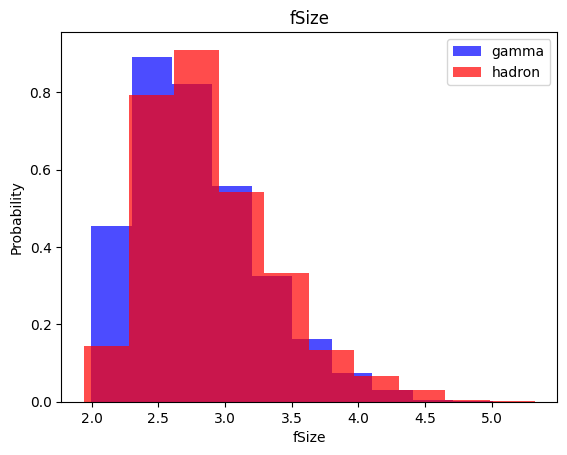

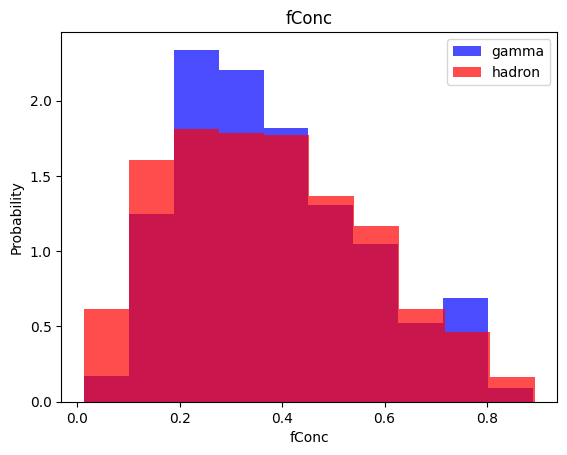

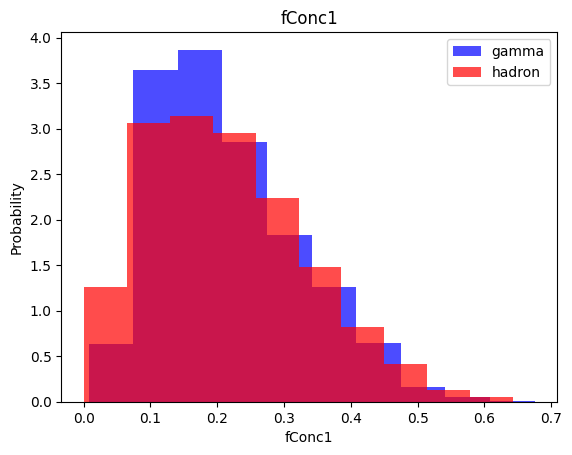

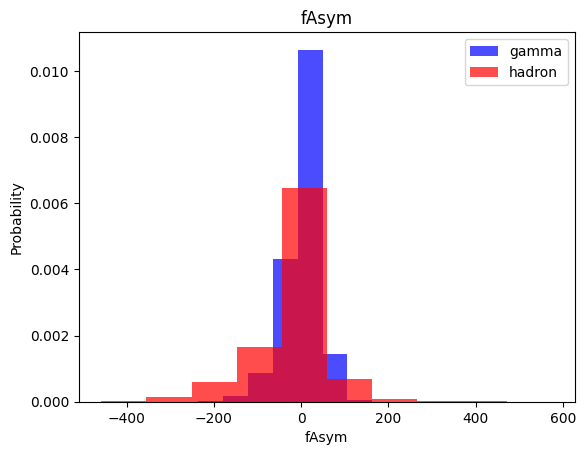

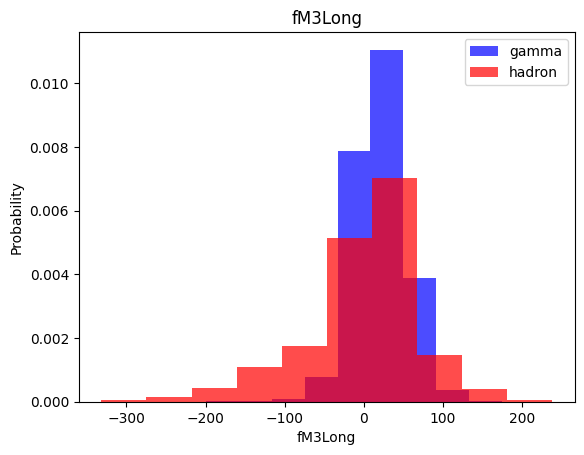

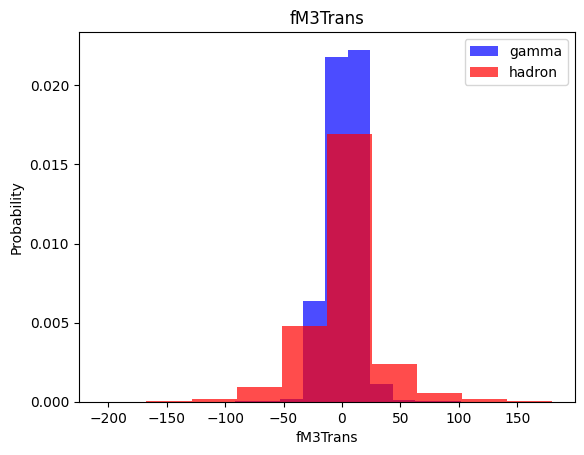

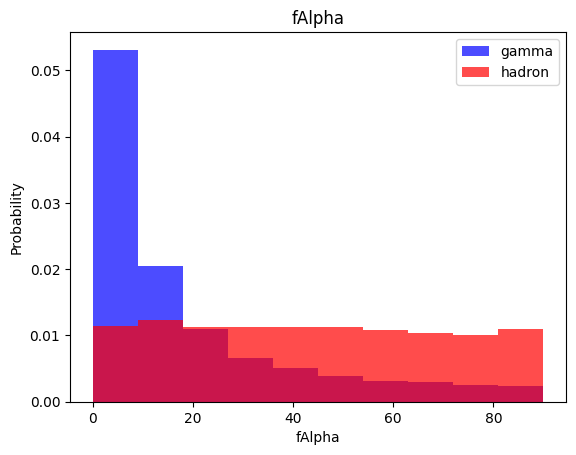

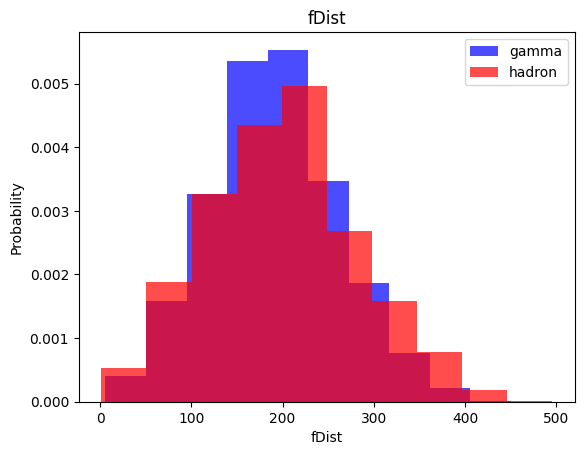

In [5]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, validation, test

In [28]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

In [29]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [30]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)

In [32]:
y_pred = knn_model.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1304
           1       0.86      0.85      0.86      2500

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [36]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.42      0.51      1304
           1       0.75      0.89      0.81      2500

    accuracy                           0.73      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# SVM

In [37]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [38]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1304
           1       0.89      0.90      0.89      2500

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net

In [18]:
from sklearn.neural_network import MLPClassifier

In [39]:
nn_model = MLPClassifier()
nn_model = nn_model.fit(X_train, y_train)

/home/gufron/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
y_pred = nn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1304
           1       0.90      0.87      0.89      2500

    accuracy                           0.85      3804
   macro avg       0.84      0.85      0.84      3804
weighted avg       0.86      0.85      0.85      3804



In [21]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [42]:
import tensorflow as tf

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [44]:
nn_model.evaluate(X_valid, y_valid)

156/156 [==============================] - 0s 3ms/step - loss: 0.3556 - accuracy: 0.8433


[0.35558629035949707, 0.8433226346969604]

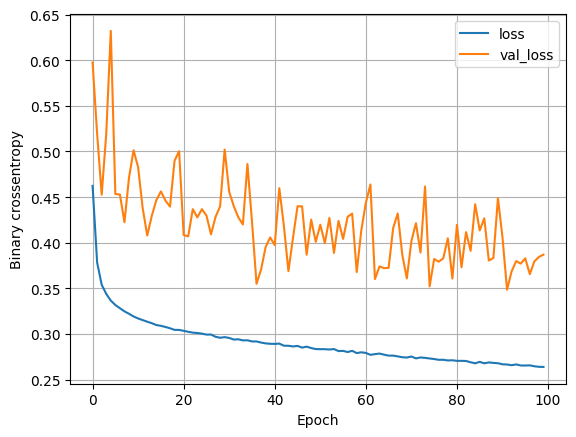

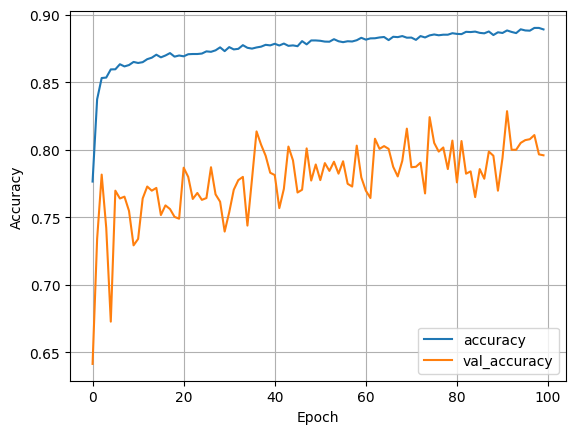

In [45]:
plot_loss(history)
plot_accuracy(history)

In [46]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history

In [47]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

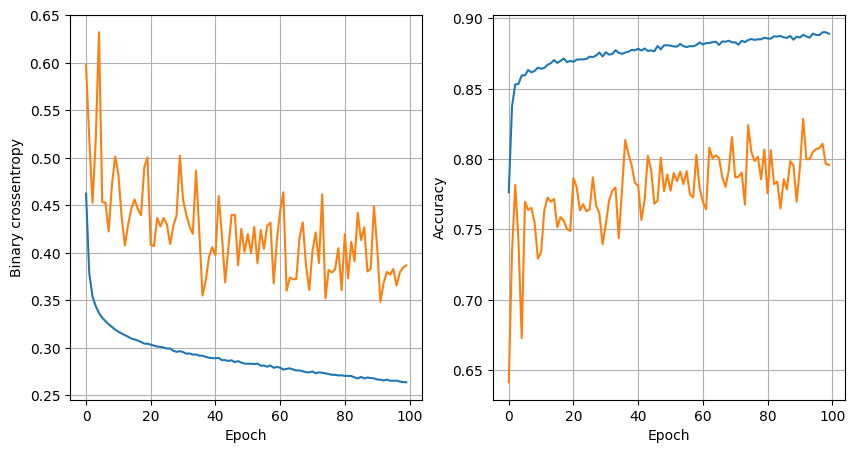

In [48]:
plot_history(history)

16 nodes, dropout 0, lr 0.01, batch_size 32


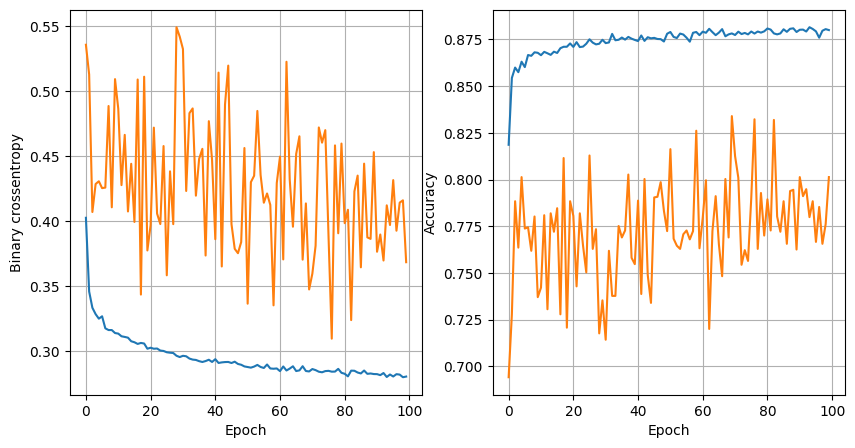

156/156 [==============================] - 0s 3ms/step - loss: 0.3509 - accuracy: 0.8514
16 nodes, dropout 0, lr 0.01, batch_size 64


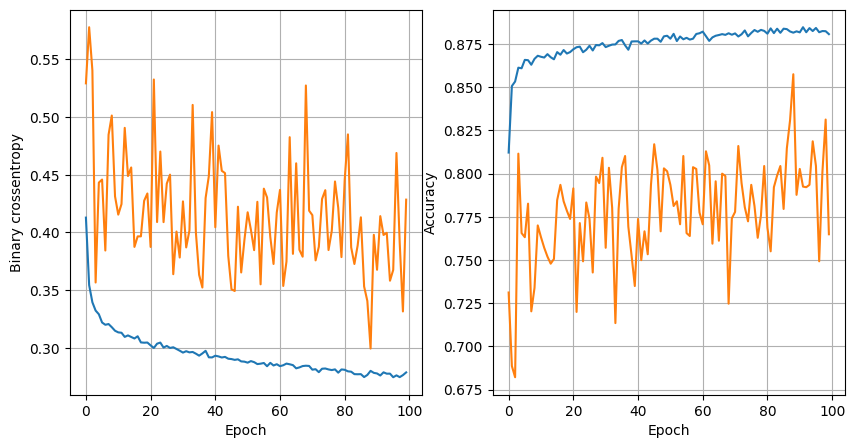

156/156 [==============================] - 1s 6ms/step - loss: 0.3777 - accuracy: 0.8369
16 nodes, dropout 0, lr 0.01, batch_size 128


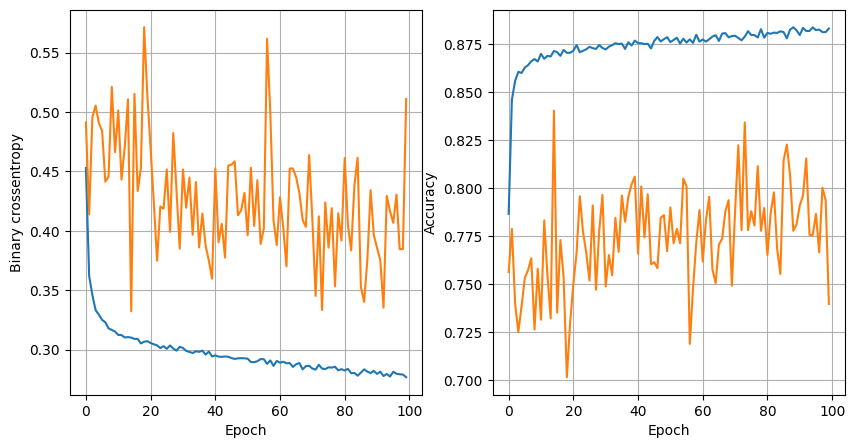

156/156 [==============================] - 0s 3ms/step - loss: 0.3879 - accuracy: 0.8403
16 nodes, dropout 0, lr 0.005, batch_size 32


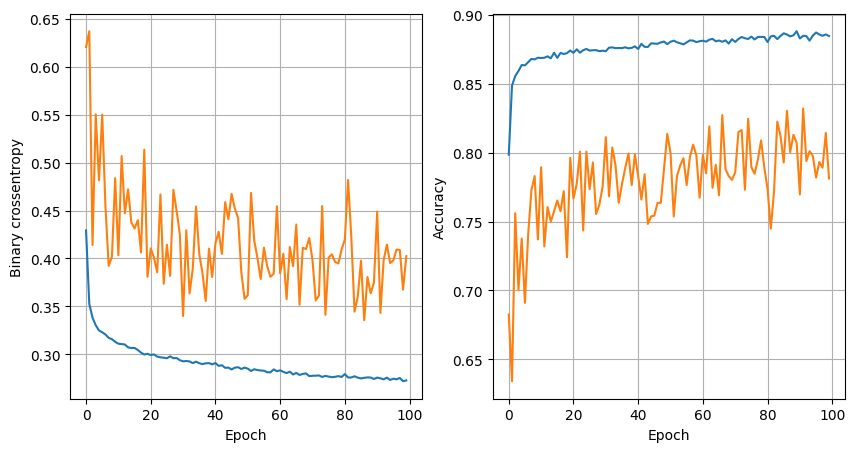

156/156 [==============================] - 0s 3ms/step - loss: 0.3520 - accuracy: 0.8550
16 nodes, dropout 0, lr 0.005, batch_size 64


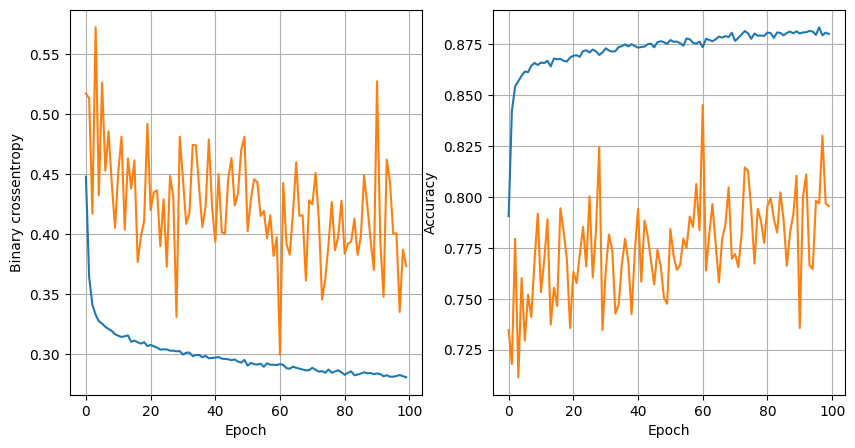

156/156 [==============================] - 0s 3ms/step - loss: 0.3629 - accuracy: 0.8455
16 nodes, dropout 0, lr 0.005, batch_size 128


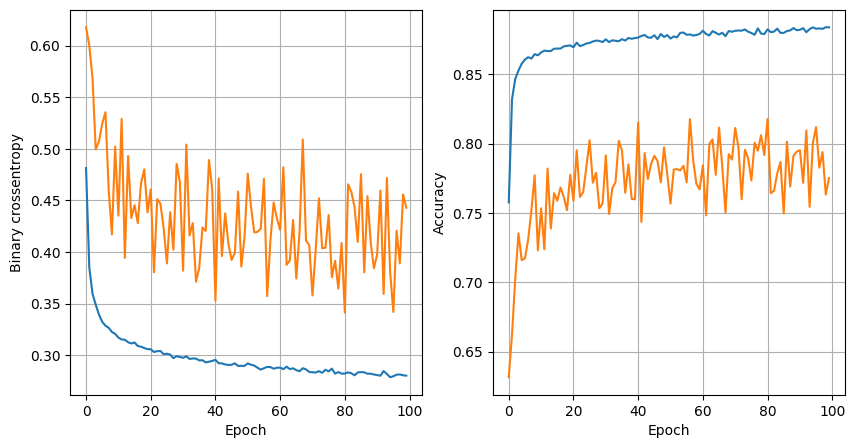

156/156 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8500
16 nodes, dropout 0, lr 0.001, batch_size 32


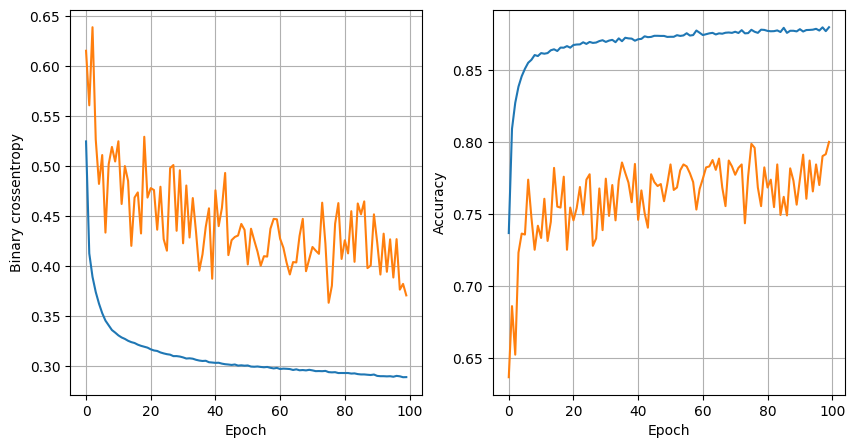

156/156 [==============================] - 0s 3ms/step - loss: 0.3418 - accuracy: 0.8467
16 nodes, dropout 0, lr 0.001, batch_size 64


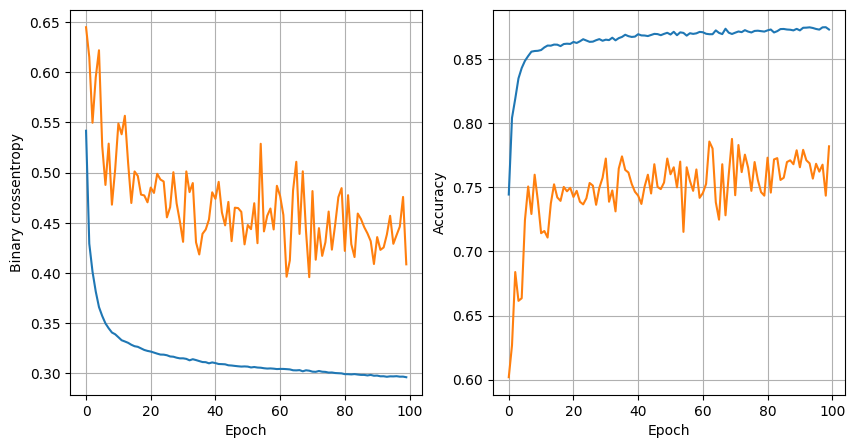

156/156 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8504
16 nodes, dropout 0, lr 0.001, batch_size 128


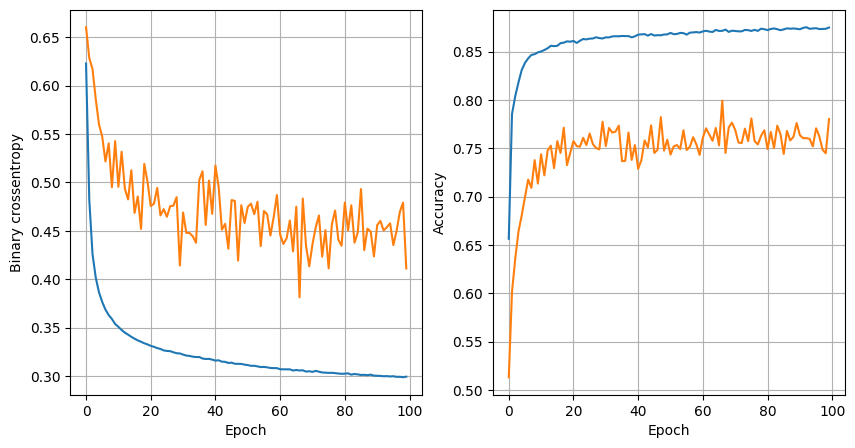

156/156 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.8469
16 nodes, dropout 0.2, lr 0.01, batch_size 32


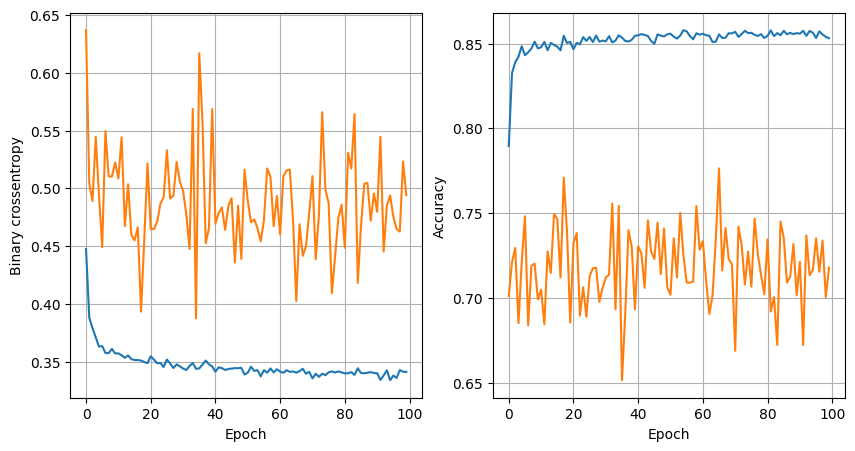

156/156 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8337
16 nodes, dropout 0.2, lr 0.01, batch_size 64


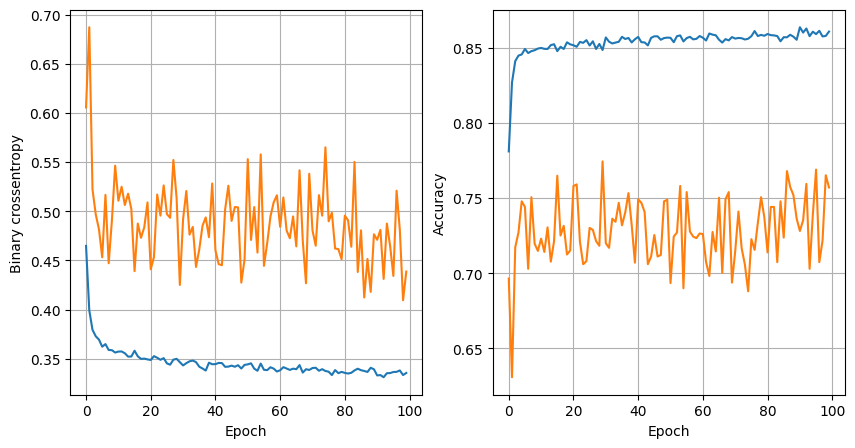

156/156 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.8433
16 nodes, dropout 0.2, lr 0.01, batch_size 128


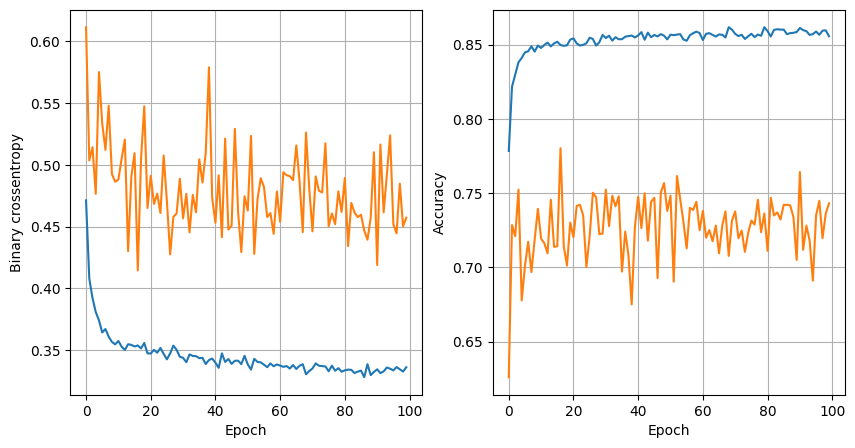

156/156 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.8437
16 nodes, dropout 0.2, lr 0.005, batch_size 32


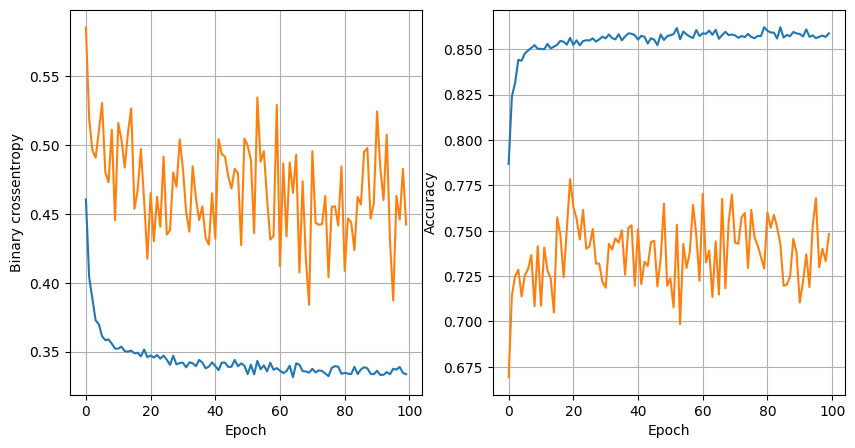

156/156 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.8459
16 nodes, dropout 0.2, lr 0.005, batch_size 64


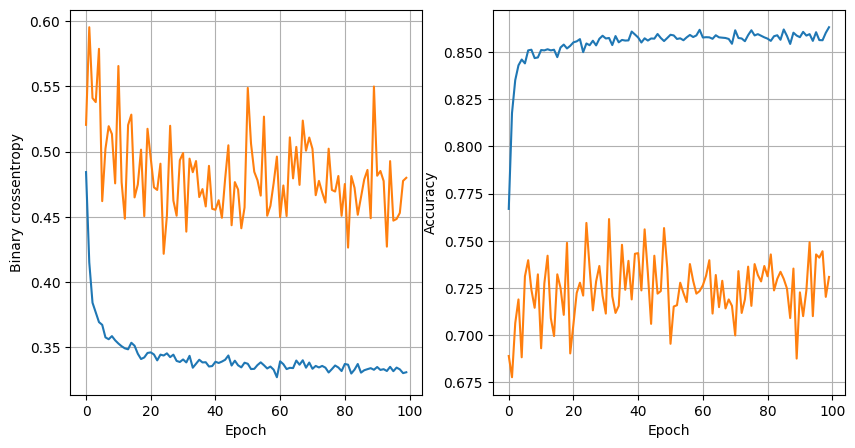

156/156 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8359
16 nodes, dropout 0.2, lr 0.005, batch_size 128


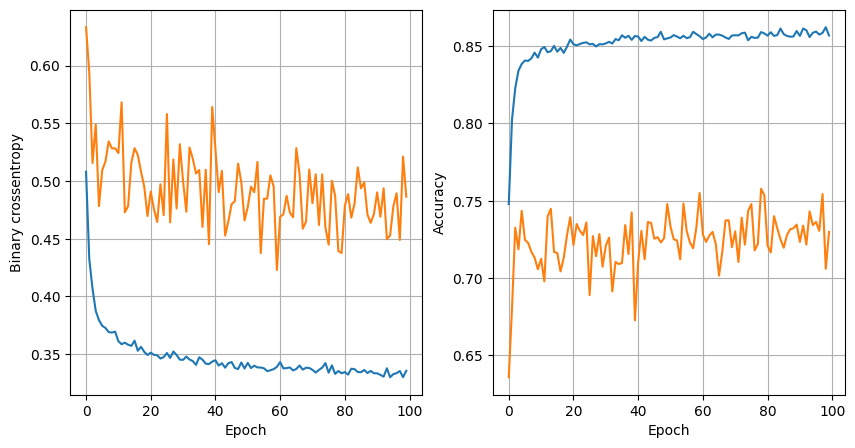

156/156 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8375
16 nodes, dropout 0.2, lr 0.001, batch_size 32


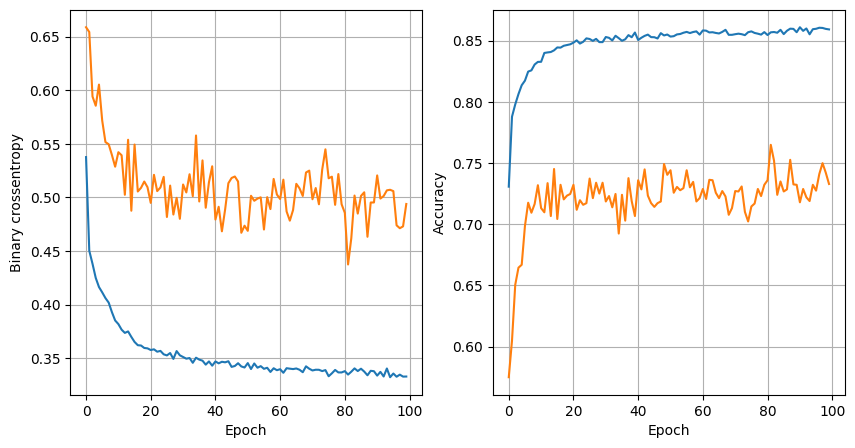

156/156 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8389
16 nodes, dropout 0.2, lr 0.001, batch_size 64


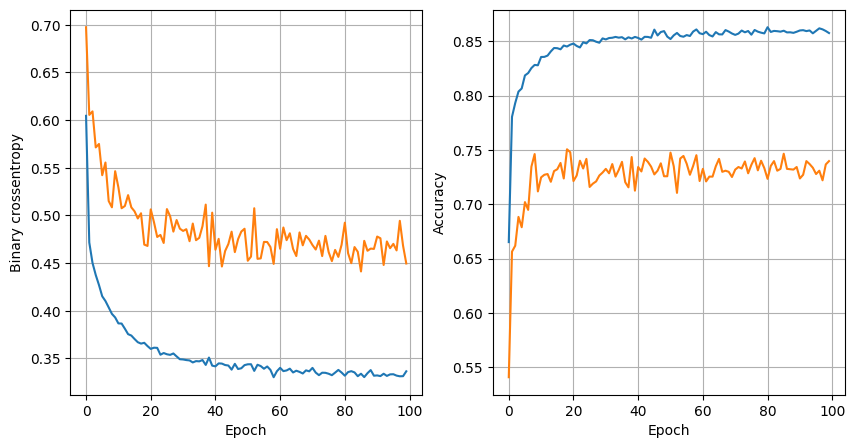

156/156 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8457
16 nodes, dropout 0.2, lr 0.001, batch_size 128


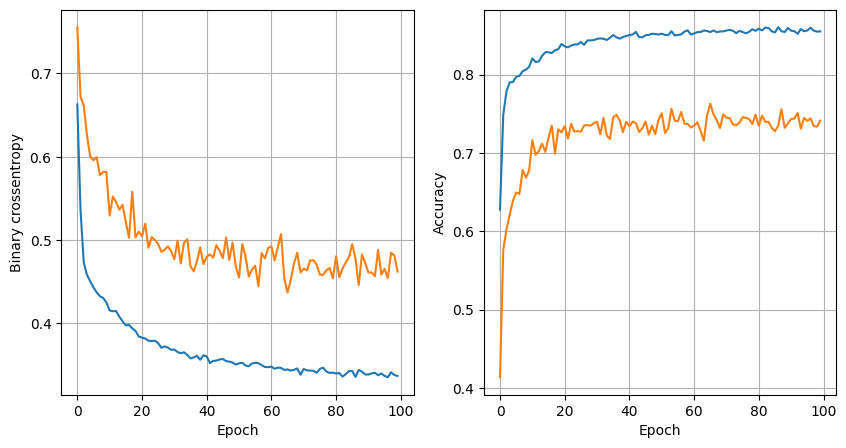

156/156 [==============================] - 0s 3ms/step - loss: 0.3490 - accuracy: 0.8443
32 nodes, dropout 0, lr 0.01, batch_size 32


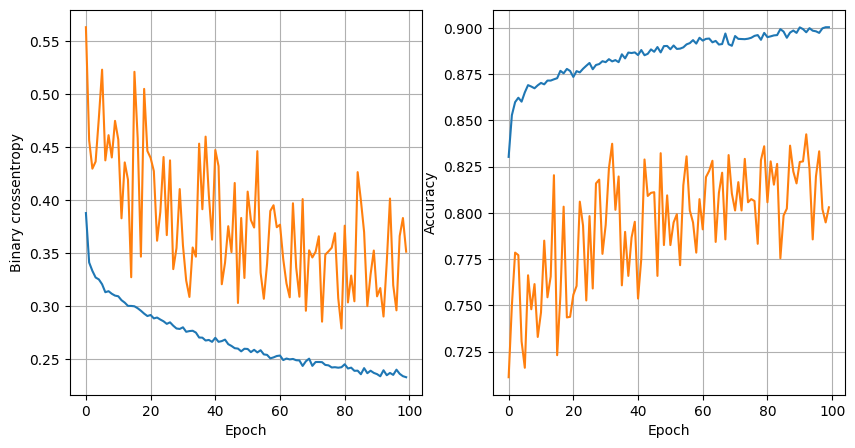

156/156 [==============================] - 1s 3ms/step - loss: 0.4844 - accuracy: 0.8351
32 nodes, dropout 0, lr 0.01, batch_size 64


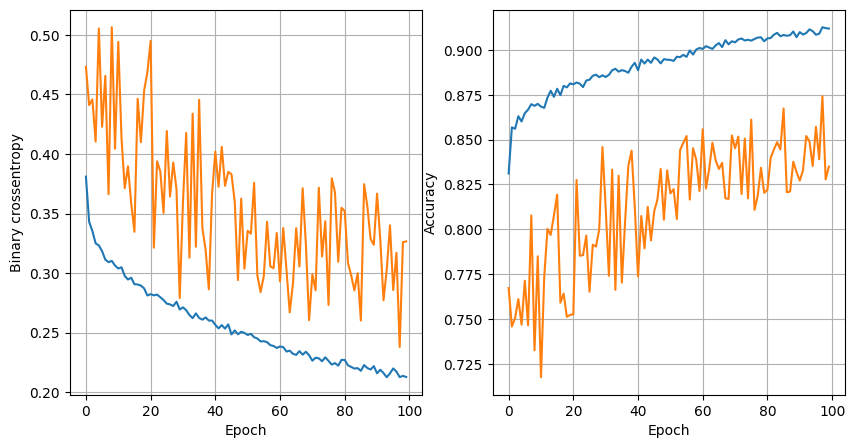

156/156 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.8415
32 nodes, dropout 0, lr 0.01, batch_size 128


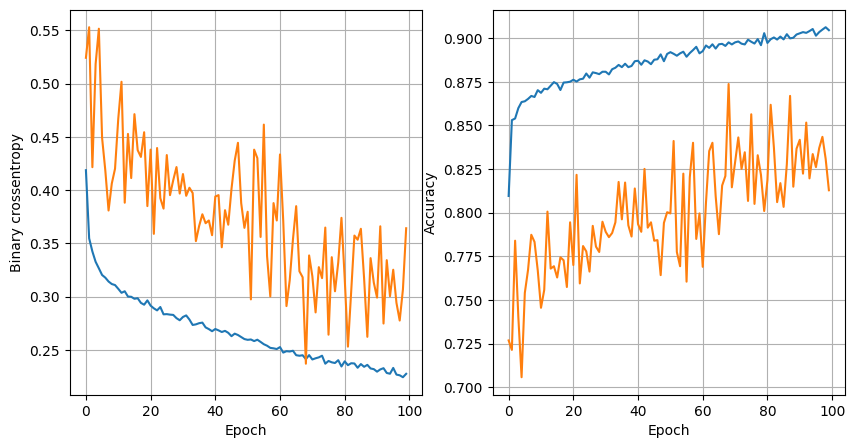

156/156 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.8359
32 nodes, dropout 0, lr 0.005, batch_size 32


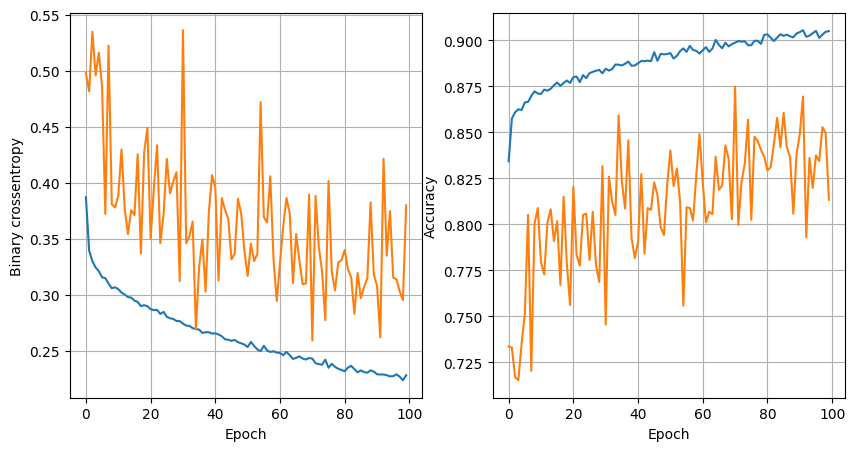

156/156 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.8433
32 nodes, dropout 0, lr 0.005, batch_size 64


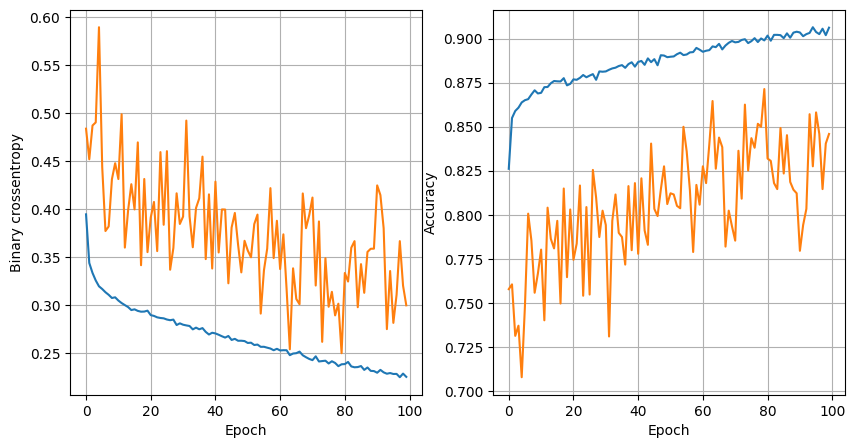

156/156 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8413
32 nodes, dropout 0, lr 0.005, batch_size 128


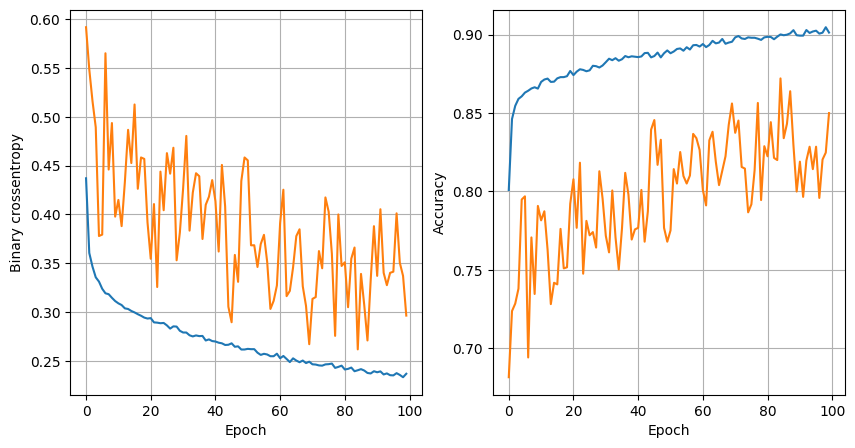

156/156 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8413
32 nodes, dropout 0, lr 0.001, batch_size 32


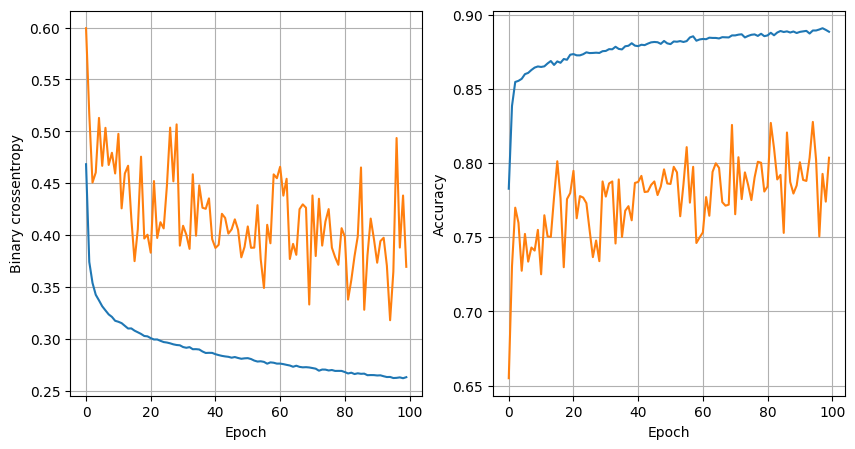

156/156 [==============================] - 1s 6ms/step - loss: 0.3481 - accuracy: 0.8518
32 nodes, dropout 0, lr 0.001, batch_size 64


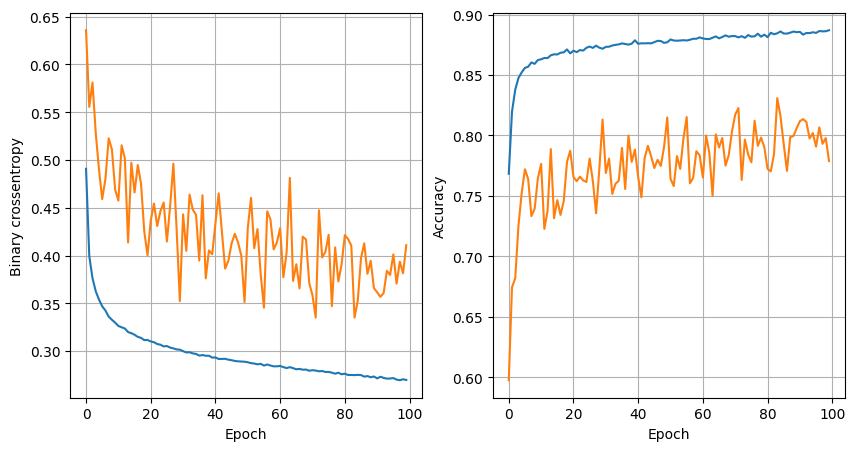

156/156 [==============================] - 1s 3ms/step - loss: 0.3566 - accuracy: 0.8449
32 nodes, dropout 0, lr 0.001, batch_size 128


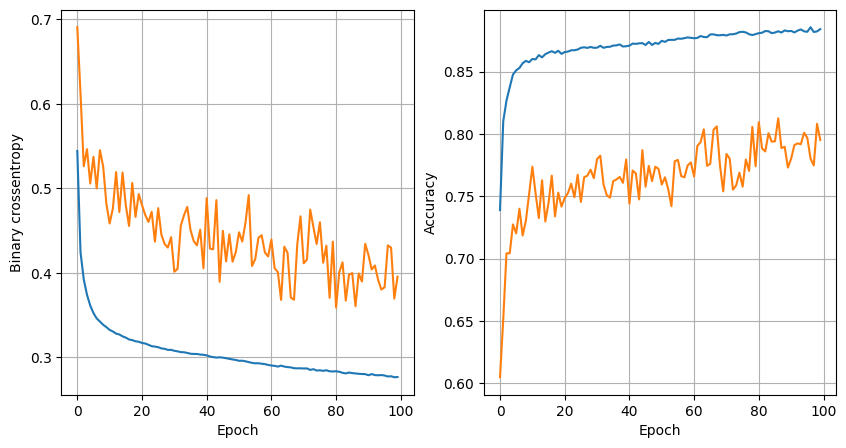

156/156 [==============================] - 0s 3ms/step - loss: 0.3507 - accuracy: 0.8556
32 nodes, dropout 0.2, lr 0.01, batch_size 32


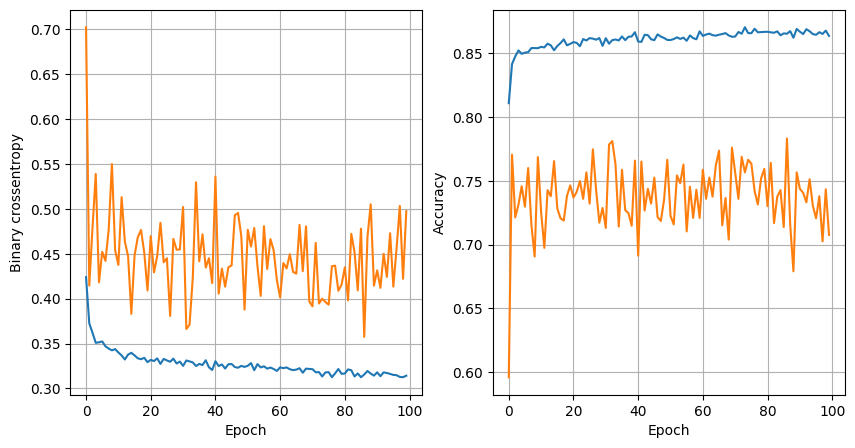

156/156 [==============================] - 1s 7ms/step - loss: 0.3724 - accuracy: 0.8276
32 nodes, dropout 0.2, lr 0.01, batch_size 64


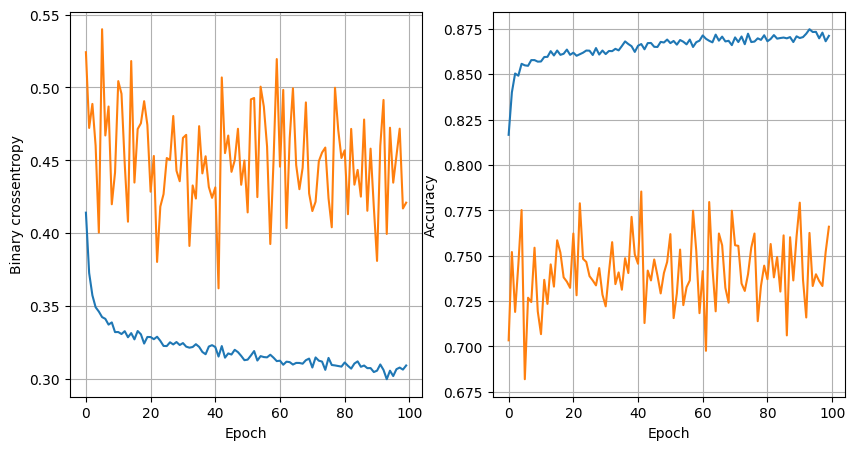

156/156 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8471
32 nodes, dropout 0.2, lr 0.01, batch_size 128


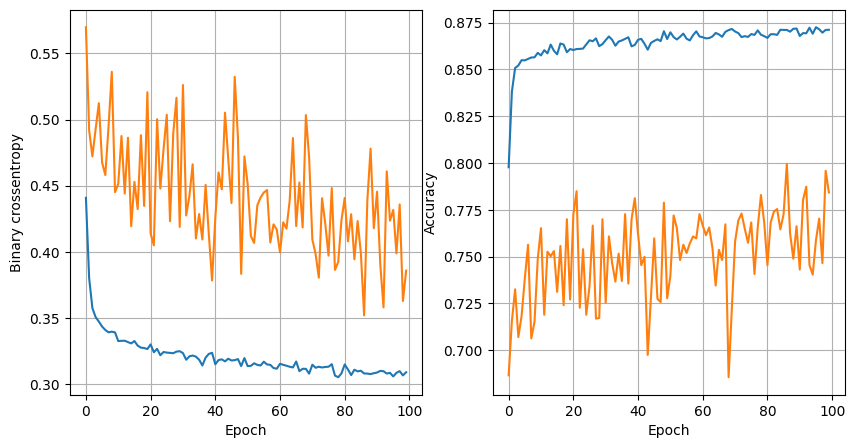

156/156 [==============================] - 1s 4ms/step - loss: 0.3380 - accuracy: 0.8479
32 nodes, dropout 0.2, lr 0.005, batch_size 32


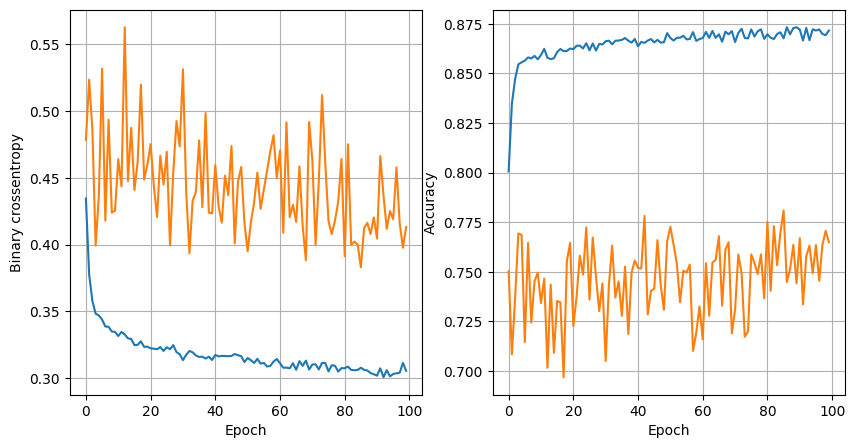

156/156 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8471
32 nodes, dropout 0.2, lr 0.005, batch_size 64


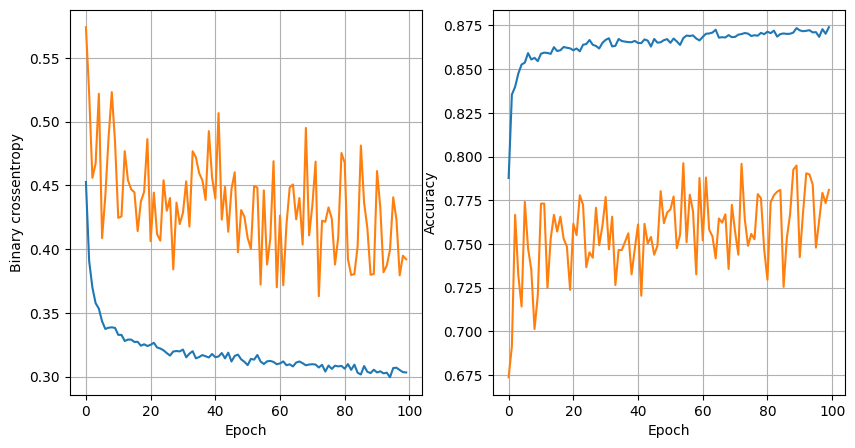

156/156 [==============================] - 1s 4ms/step - loss: 0.3413 - accuracy: 0.8496
32 nodes, dropout 0.2, lr 0.005, batch_size 128


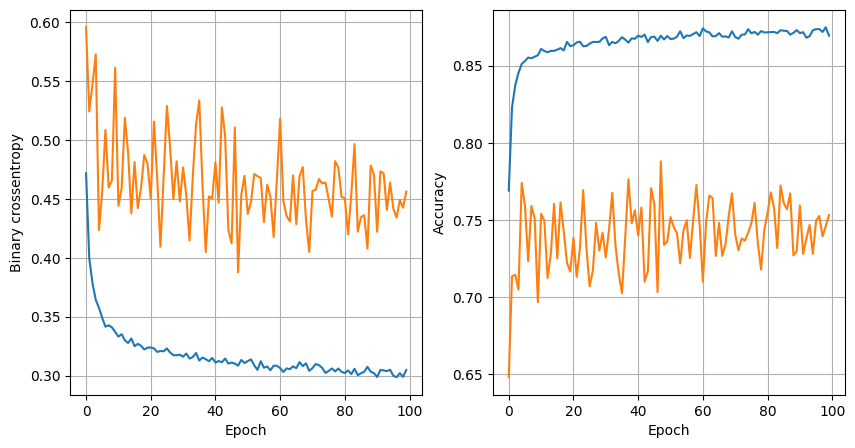

156/156 [==============================] - 1s 4ms/step - loss: 0.3501 - accuracy: 0.8447
32 nodes, dropout 0.2, lr 0.001, batch_size 32


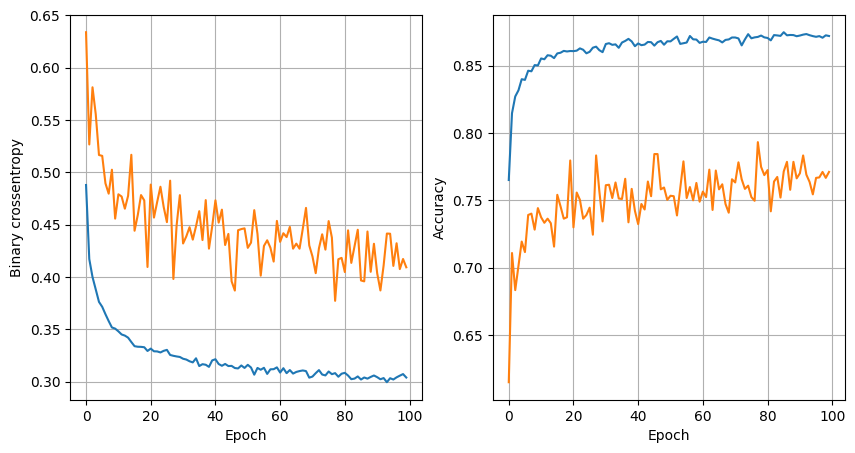

156/156 [==============================] - 1s 4ms/step - loss: 0.3363 - accuracy: 0.8524
32 nodes, dropout 0.2, lr 0.001, batch_size 64


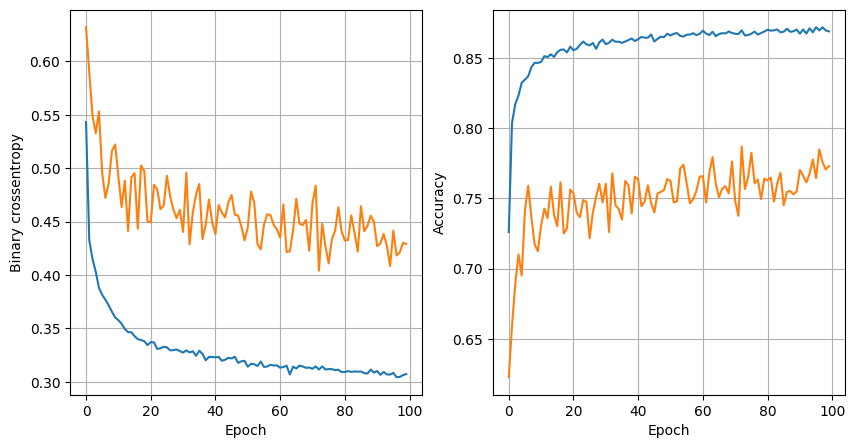

156/156 [==============================] - 1s 4ms/step - loss: 0.3444 - accuracy: 0.8445
32 nodes, dropout 0.2, lr 0.001, batch_size 128


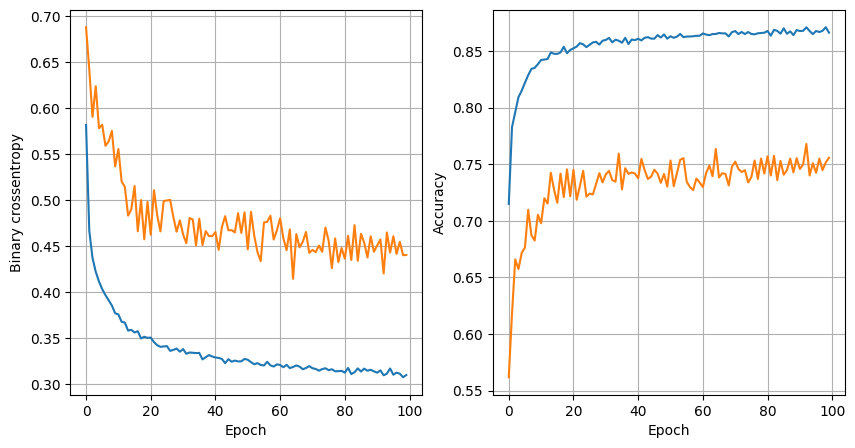

156/156 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8492
64 nodes, dropout 0, lr 0.01, batch_size 32


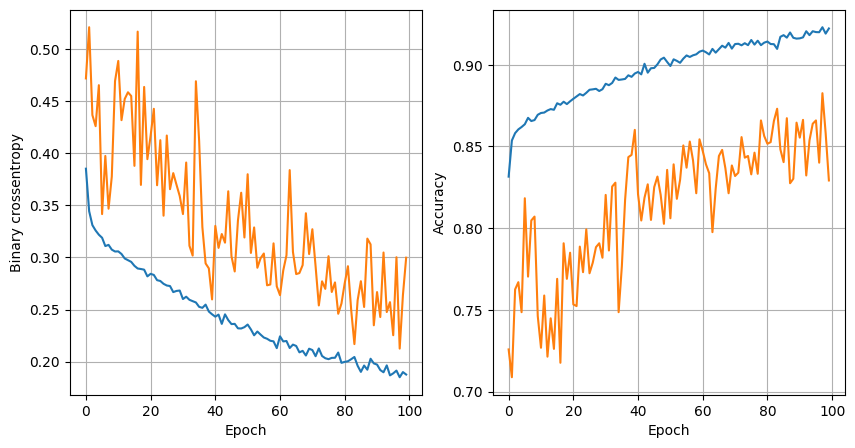

156/156 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.8234
64 nodes, dropout 0, lr 0.01, batch_size 64


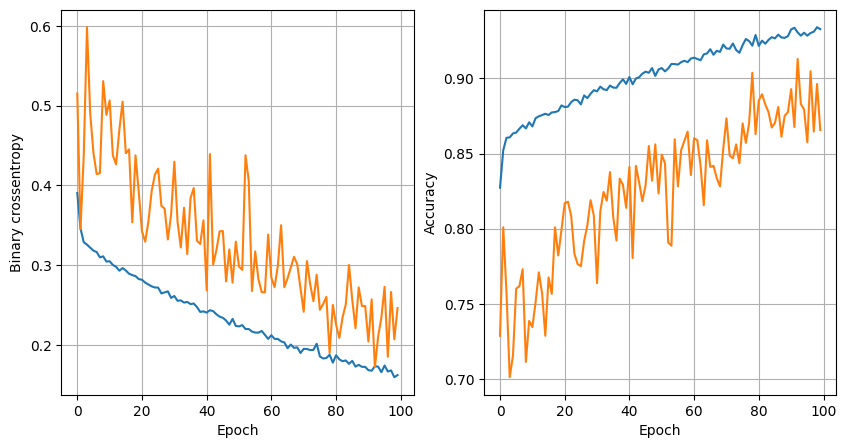

156/156 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.8393
64 nodes, dropout 0, lr 0.01, batch_size 128


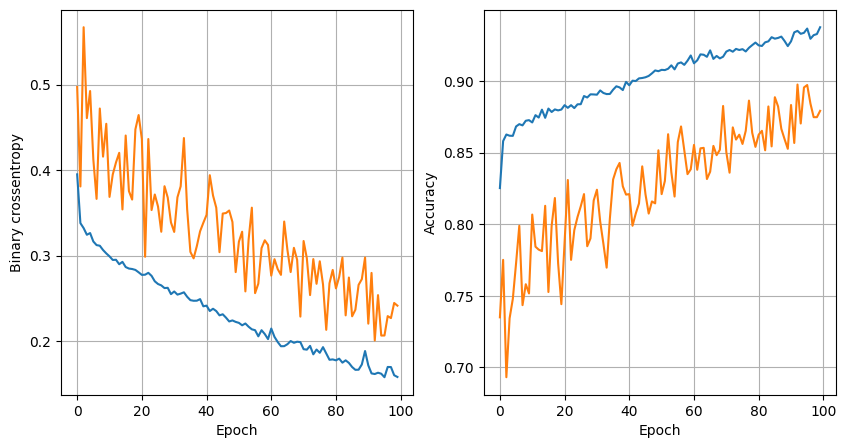

156/156 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.8401
64 nodes, dropout 0, lr 0.005, batch_size 32


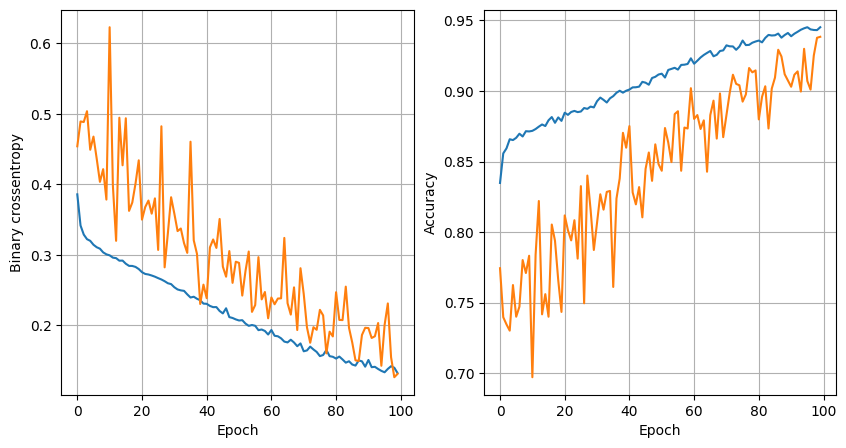

156/156 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.8399
64 nodes, dropout 0, lr 0.005, batch_size 64


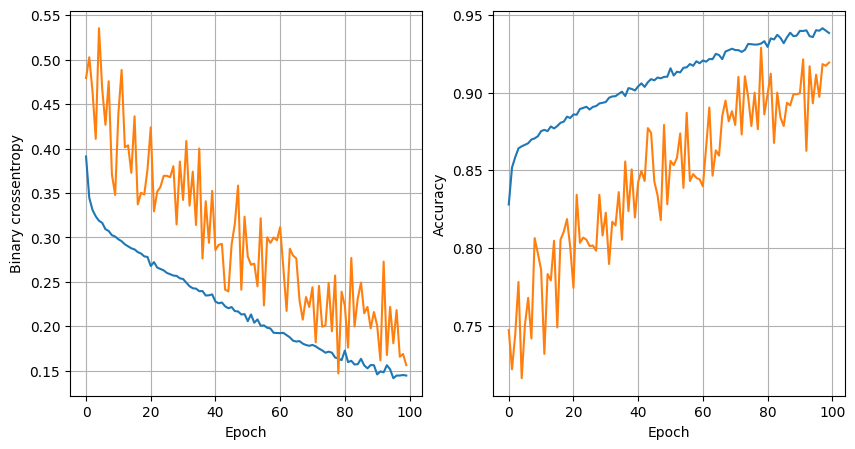

156/156 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.8467
64 nodes, dropout 0, lr 0.005, batch_size 128


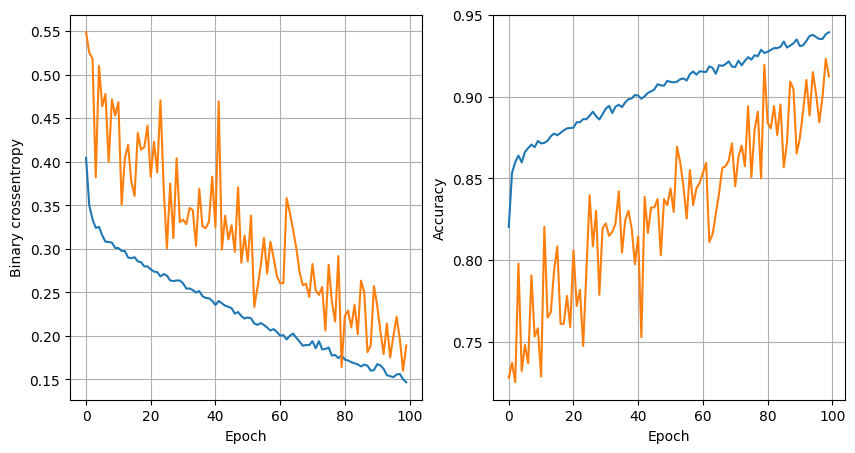

156/156 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.8278
64 nodes, dropout 0, lr 0.001, batch_size 32


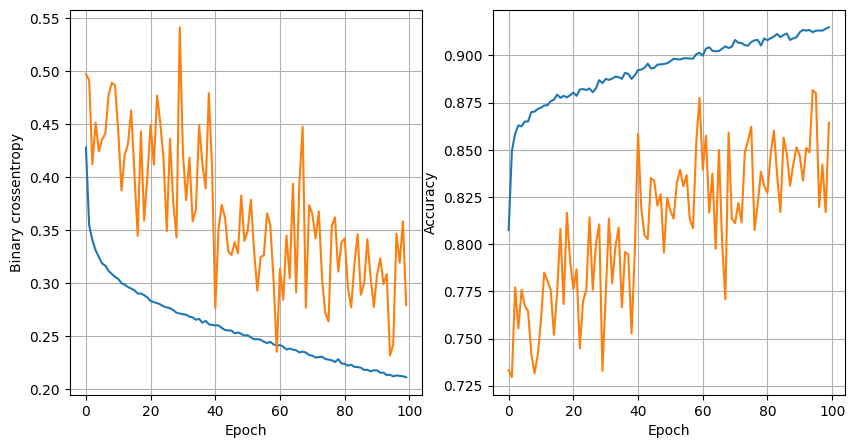

156/156 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8512
64 nodes, dropout 0, lr 0.001, batch_size 64


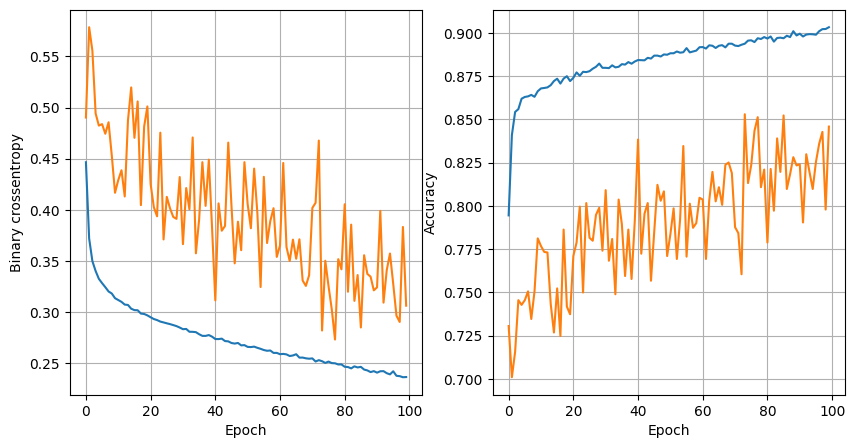

156/156 [==============================] - 0s 2ms/step - loss: 0.3713 - accuracy: 0.8532
64 nodes, dropout 0, lr 0.001, batch_size 128


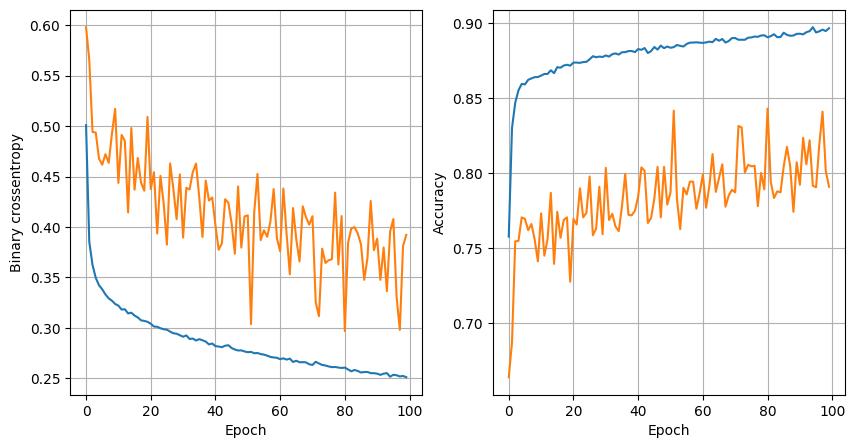

156/156 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8528
64 nodes, dropout 0.2, lr 0.01, batch_size 32


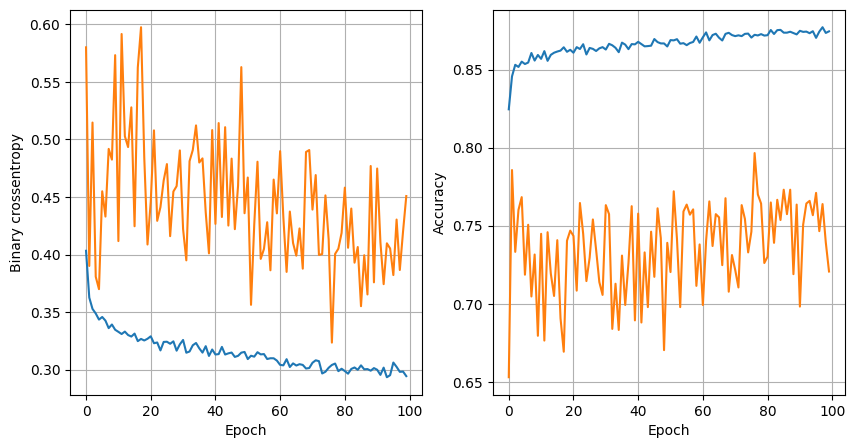

156/156 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8292
64 nodes, dropout 0.2, lr 0.01, batch_size 64


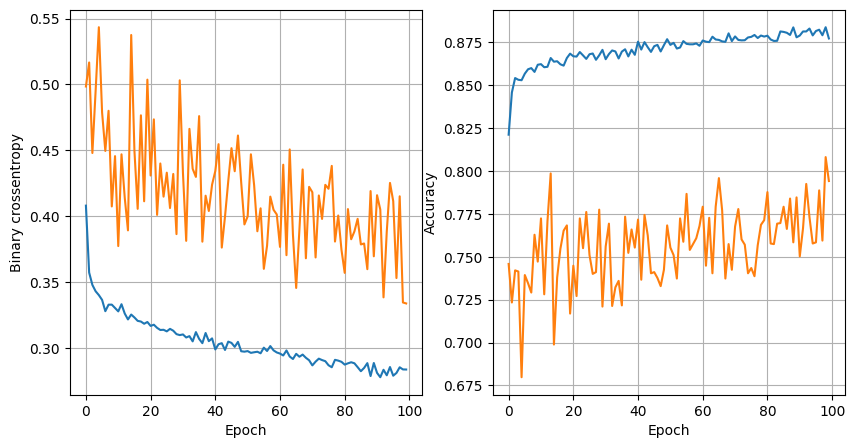

156/156 [==============================] - 0s 1ms/step - loss: 0.3520 - accuracy: 0.8455
64 nodes, dropout 0.2, lr 0.01, batch_size 128


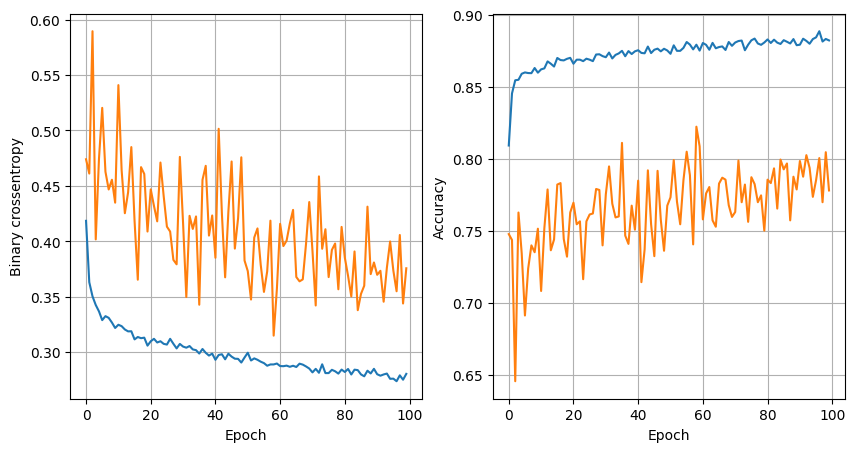

156/156 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8453
64 nodes, dropout 0.2, lr 0.005, batch_size 32


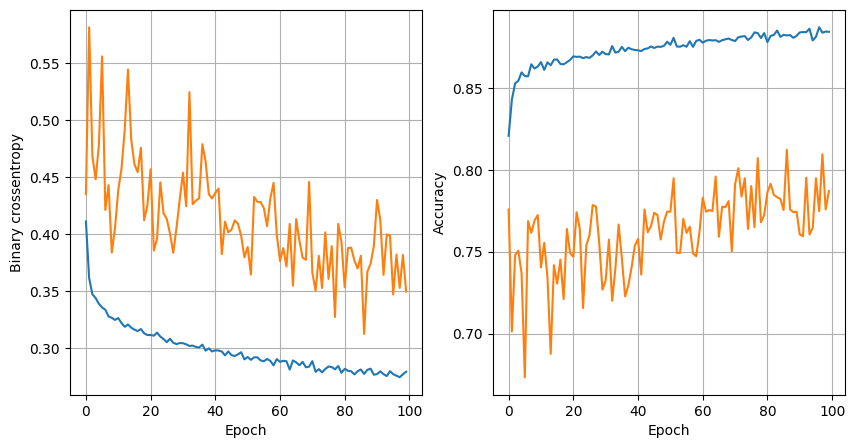

156/156 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8471
64 nodes, dropout 0.2, lr 0.005, batch_size 64


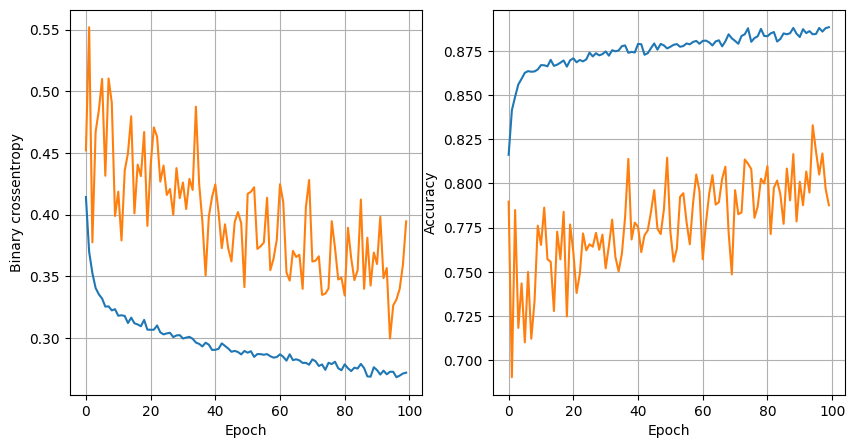

156/156 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8524
64 nodes, dropout 0.2, lr 0.005, batch_size 128


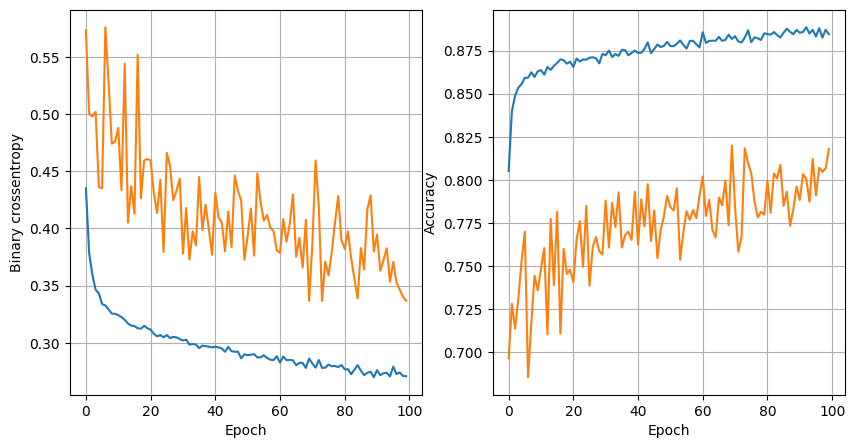

156/156 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8608
64 nodes, dropout 0.2, lr 0.001, batch_size 32


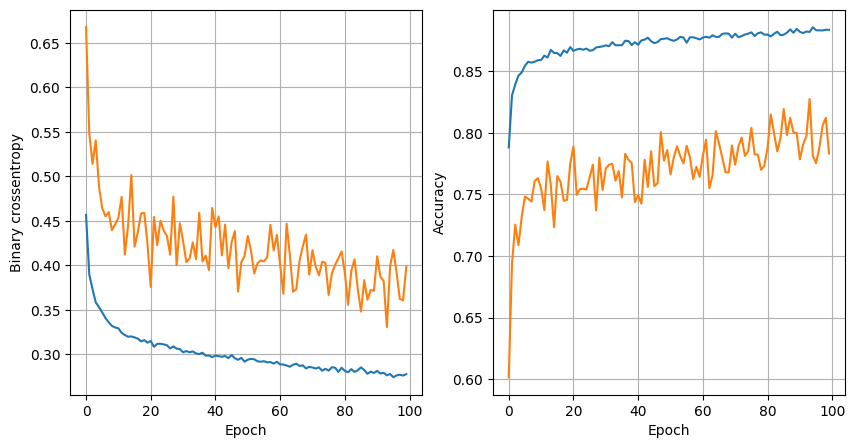

156/156 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8520
64 nodes, dropout 0.2, lr 0.001, batch_size 64


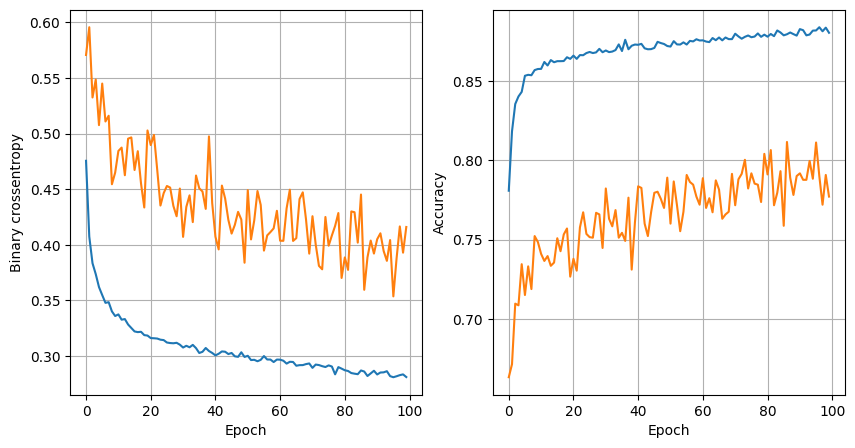

156/156 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8514
64 nodes, dropout 0.2, lr 0.001, batch_size 128


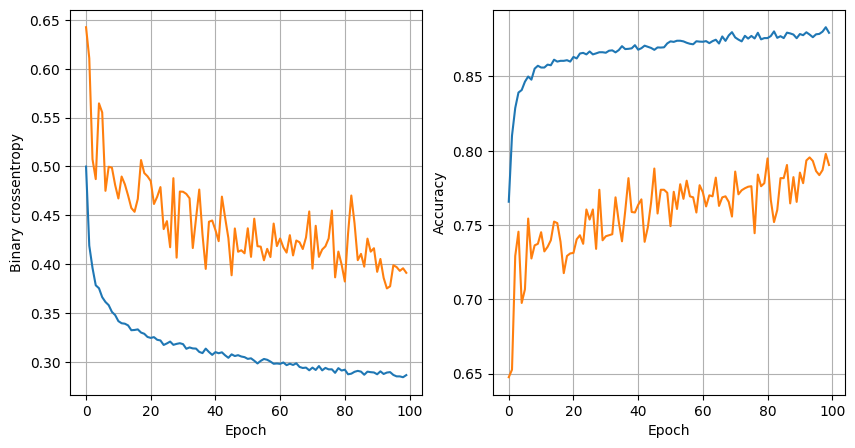

156/156 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8546


In [49]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}')
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [50]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1304
           1       0.88      0.93      0.91      2500

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

